# Appendix D: Random Forests Regression


Research question: Through plotting local temperature against energy demand in MW, how accurately can we predict the expected energy demand in a chosen year assuming a 2 degrees increase in global temperature due to global warming?


Only the Victorian temperature-demand dataset was used

To determine the model of best fit, the random forest technique is tested for error metrics and r2 score as a means of a justification. The model of best fit is used to simulate demand in changed conditions.

Random forests regression is not recommended for time series problems. They are reserved for other problems such as predicting continuous classifier values such as price of products in the future. This is due to the extrapolation problem.

Random forest regression is really good and accurate for datasets and contexts that do not require extrapolation. Extrapoltion is required when the testing set has values that lie outside of the range of training values. In this case, temperature does not really need extrapolation but other confounding factors that affect demand might, such as cost. SVMs are better if we want to change our temperatures so they are outside of the training set values of temperature.

Random forests regression uses continous values on decision trees to determine the next regressed value. It determines the next regressed value by choosing the decision tree that results in the minimal sum of squared errors (SSE) within a given region, defined by the last decision tree (the number of decision trees being regressed over is manually set). Random forests regression is performed independently over multiple regions of data. The prediction of the random forest is the average of all the regressed values in each localised region. Because the average is taken from the results of the regression, the extrapolation problem occurs. And because the regression occurs over a localised region, normalisation is unnecessary as partitioned data is not affected by the scale of measurement features.

Cross validation is automated since each decision tree acts as function that maximises the information gained by each subset of training data. Regularisation is not necessary for random forest regression even though the decision trees within the random forest are technically linear, because there is no penalty cost function. Instead, when repeating the decision trees function in a random forest, regularisation is performed automatically in such a way that both bias and variance are lowered to the lowest possible. However, regularisation can be done to ensure that variance is lowered to differing degrees rather than to the fullest extent.

In [1]:
#import libraries needed for rf regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from statistics import median
import warnings
warnings.filterwarnings("ignore")

the mean absoulute error is 635.127
the root mean squared error is 773.023
the r2 is 0.223


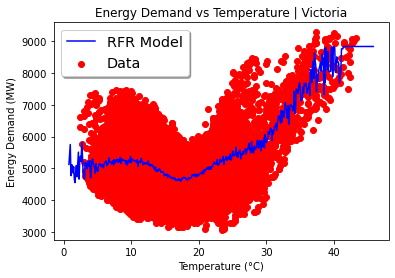

In [2]:
VIC_data=pd.read_csv('VIC_Data_Compiled.csv')
VIC_data = VIC_data.set_index(pd.to_datetime(VIC_data["date"]))
VIC_data=VIC_data.drop('date',axis=1)
x=VIC_data['TEMP']
y=VIC_data['DEMAND']
training_set= VIC_data[pd.Timestamp("2015-01-01 00:00:00"):pd.Timestamp("2018-12-31 23:30:00")]
testing_set= VIC_data[pd.Timestamp("2019-01-01 00:00:00"):pd.Timestamp("2020-01-01 00:00:00")]
testing_set=testing_set.reset_index()
training_set=training_set.reset_index()
x_train=np.array([training_set['TEMP']])
y_train=np.array([training_set['DEMAND']])
y_test=np.array([testing_set['DEMAND']])
x_test=np.array([testing_set['TEMP']])
x_train=np.transpose(x_train)
y_train=np.transpose(y_train)
x_test=np.transpose(x_test)
y_test=np.transpose(y_test)


regressor=RandomForestRegressor(n_estimators=10)#n_estimators optimisation?
estimator=regressor.fit(x_train,y_train)
y_pred=estimator.predict(x_test)

mae = np.round(mean_absolute_error(y_test,y_pred),3)
rmse=np.round((mean_squared_error(y_test,y_pred))**(1/2),3)
r2=np.round((r2_score(y_test,y_pred)),3)

print(f"the mean absoulute error is {mae}")
print(f"the root mean squared error is {rmse}")
print(f"the r2 is {r2}")


X_grid = np.arange(min(x), max(x),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label = "RFR Model"),
plt.scatter(x_test,y_test, color = 'red', label = "Data"),
plt.title("Energy Demand vs Temperature | Victoria")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Demand (MW)")
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()



SVR needs regularisation and since SVR is limited in capacity to perform, maybe selecting data from just one season or a couple of years to train and test on is not such a bad idea. 

Advantages:
Optimises cross validation parameters automatically by maximising greedy function
No penalty cost function for random forest regression therefore, regularisation is not always required

Disadvantages:
Limited to working in training set range.
Extrapolation is not possible.
Linear regression restriction applies.
Temperature cannot be changed at tail because range of testing needs to be restricted.

Normalisation is not necessary because algorithms using decision trees are local, meaning that they only consider data in a local domain of data to make a relative comparison.

In [3]:
Forecast_Demand_Data=VIC_data[pd.Timestamp('2019-01-01 00:00:00'):pd.Timestamp("2020-01-01 00:00:00")]+2
x_forecast=np.transpose(np.array([Forecast_Demand_Data['TEMP']]))
y_forecast=estimator.predict(x_forecast)

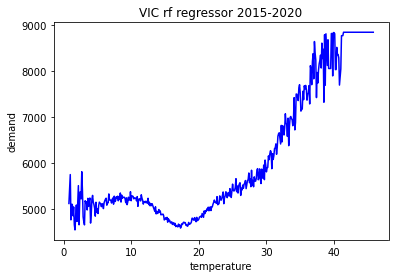

In [4]:
X_grid = np.arange(min(x), max(x),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue'),
# plt.scatter(x_forecast,y_forecast, color = 'red'),
plt.title('VIC rf regressor 2015-2020')
plt.xlabel('temperature')
plt.ylabel('demand')
plt.show()

Here are the summary statistics for demand currently in the test set without any changes to climate

In [11]:
pd.DataFrame(y_test).describe().rename(columns={0:'Original demand statistics'})

,Original demand statistics
count,17516.00000
mean,4914.30272
std,877.23182
min,3058.20000
25%,4263.52000
50%,4785.81500
75%,5408.75000
max,9289.50000


And here are the summmary statistics in the test set for demand due to a change in climate

In [12]:
pd.DataFrame(y_forecast).describe().rename(columns={0:'Forecasted demand statistics'})

,Forecasted demand statistics
count,17516.000000
mean,5057.822197
std,512.548393
min,4588.304842
25%,4750.396858
50%,4961.749364
75%,5191.680413
max,8841.005500


In [13]:
print(f"Average demand in Victoria is expected to increase by {np.round((y_forecast.mean()/y_test.mean()-1)*100,2)}% as a result of global warming")

Average demand in Victoria is expected to increase by 2.92% as a result of global warming
